In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Students_data.csv')
df #.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
# Check for null values
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [7]:
# Drop column unnamed
df.drop(columns={"Unnamed: 0"},inplace = True)
#or
#df = df.drop("Unnamed: 0", axis = 1)

In [8]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [9]:
df.Gender.value_counts()

Gender
female    15424
male      15217
Name: count, dtype: int64

Distribution of gender

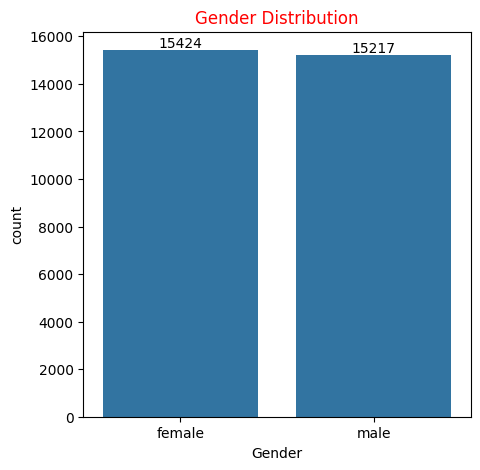

In [10]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution', color = 'red', fontsize=12)
plt.show()

From the above chart, we can analye that there are more females than
males in the data

In [11]:
# ParentEduc in terms of students' scores
grupo = df.groupby(['ParentEduc']).agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
grupo

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


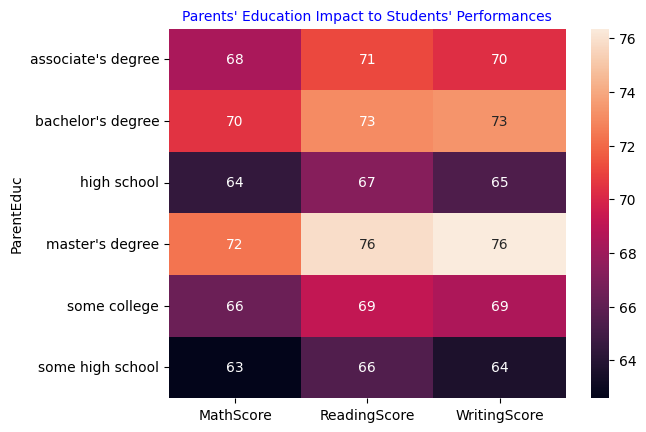

In [12]:
sns.heatmap(grupo, annot = True)
plt.title("Parents' Education Impact to Students' Performances", color ='blue',fontsize=10)
plt.show()

From the above chart, we have concluded that the parents education level have a big
impact on the performances of their children in school. It can be seen from the chart
that parents with masters degree have kids with the best performances. Again, children 
who have parents with some high school performed the worst.

In [13]:
# Impact of parents' marital status to students' performances
grup = df.groupby(['ParentMaritalStatus']).agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
grup

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


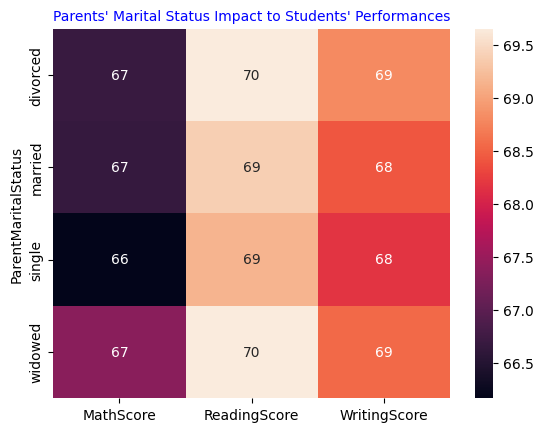

In [14]:
sns.heatmap(grup, annot = True)
plt.title("Parents' Marital Status Impact to Students' Performances", color ='blue',fontsize=10)
plt.show()

From the above chart, the parents' marital status have a negligible impact to the
students performances

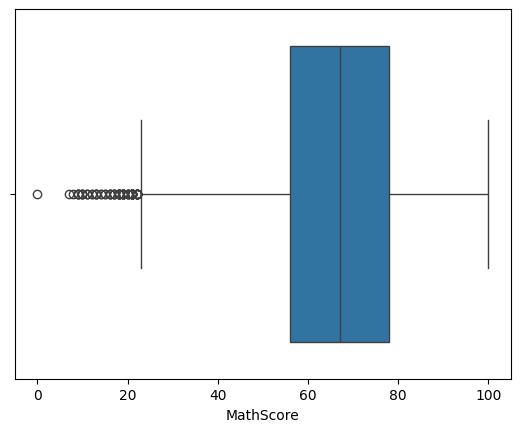

In [15]:
sns.boxplot(data = df, x='MathScore')
plt.show()

The min score of MathScore a student can have is about 22, while
the max score is 100. Values from 22 down are outliers

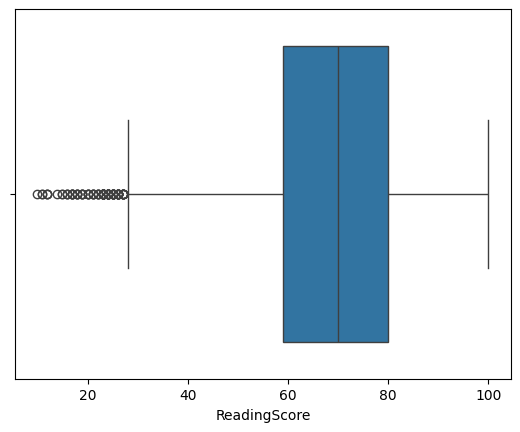

In [16]:
sns.boxplot(data = df, x='ReadingScore')
plt.show()

In [17]:
# The min value for readingscore is 28. Values from 28 below are outliers

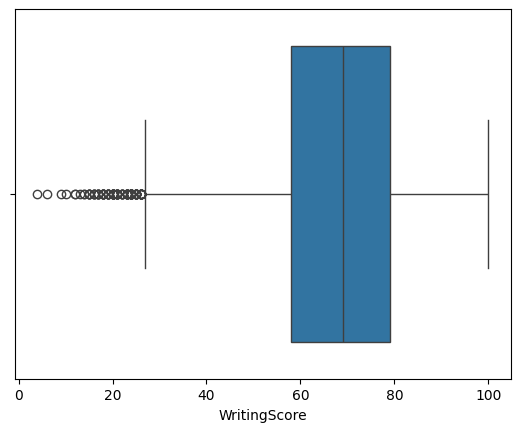

In [18]:
sns.boxplot(data = df, x='WritingScore')
plt.show()

In [19]:
#The min score for writingscore is 26. Values below them are outliers

In [20]:
df['WklyStudyHours'].unique()

array(['< 5', '5 - 10', '> 10', nan], dtype=object)

In [21]:
# grouping by weekly study hours
grupe = df.groupby(['WklyStudyHours']).agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
grupe

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


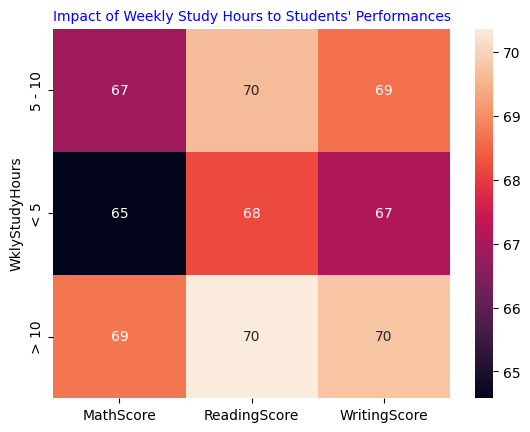

In [22]:
sns.heatmap(grupe, annot = True)
plt.title("Impact of Weekly Study Hours to Students' Performances", color ='blue',fontsize=10)
plt.show()

From the above chart, weekly study hour have little impact on the
performances of the students. Those that studied more than 10 hours
tend to score more mark overall.

In [23]:
df1 = df.Gender.value_counts()
df1

Gender
female    15424
male      15217
Name: count, dtype: int64

In [24]:
df2 = df1.to_frame()

In [25]:
df2

,count
Gender,
female,15424
male,15217


In [26]:
df2 = df2.reset_index()
df2

,Gender,count
0,female,15424
1,male,15217


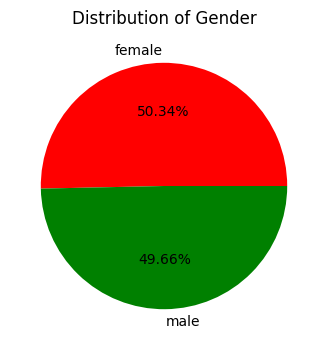

In [27]:
plt.figure(figsize= (6,4))
colors = ['red','green']
plt.pie(df2['count'], labels= df2['Gender'].values, colors=colors, autopct= '%0.2f%%')
plt.title('Distribution of Gender')
plt.show()

Distribution of ethnic groups

In [28]:
df.EthnicGroup.unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [29]:
GroupA = df.loc[(df['EthnicGroup']== "group A")].count()
GroupB = df.loc[(df['EthnicGroup']== 'group B')].count()
GroupC = df.loc[(df['EthnicGroup']== 'group C')].count()
GroupD = df.loc[(df['EthnicGroup']== 'group D')].count()
GroupE = df.loc[(df['EthnicGroup']== "group E")].count()
#GroupE['EthnicGroup']

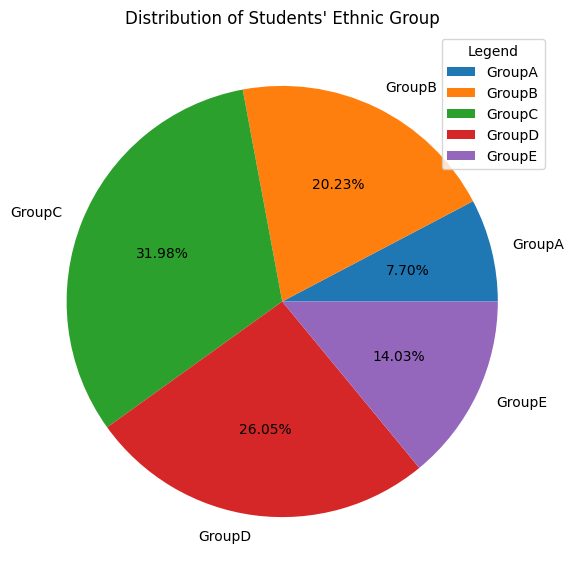

In [30]:
plt.figure(figsize= (9,7))
ethnic_group = [GroupA['EthnicGroup'],GroupB['EthnicGroup'],GroupC['EthnicGroup'],
         GroupD['EthnicGroup'],GroupE['EthnicGroup']]
l =['GroupA','GroupB','GroupC','GroupD','GroupE']
plt.pie(ethnic_group, labels = l, autopct= '%0.2f%%')
plt.title("Distribution of Students' Ethnic Group")
plt.legend(title='Legend',loc='upper right')
plt.show()

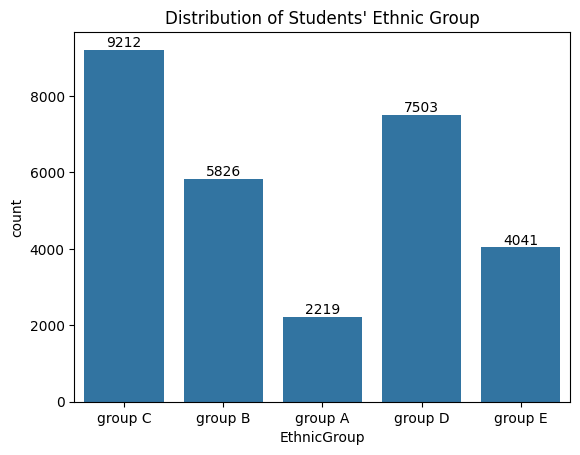

In [32]:
by = sns.countplot(data = df, x='EthnicGroup')
by.bar_label(by.containers[0])
plt.title("Distribution of Students' Ethnic Group")
plt.show()

In [33]:
barsample ={'year':['1990','2005','2010','2020','2022'],'sales':[50000,65000,40000,27500,90000]}
gf = pd.DataFrame(barsample)
gf

,year,sales
0,1990,50000
1,2005,65000
2,2010,40000
3,2020,27500
4,2022,90000


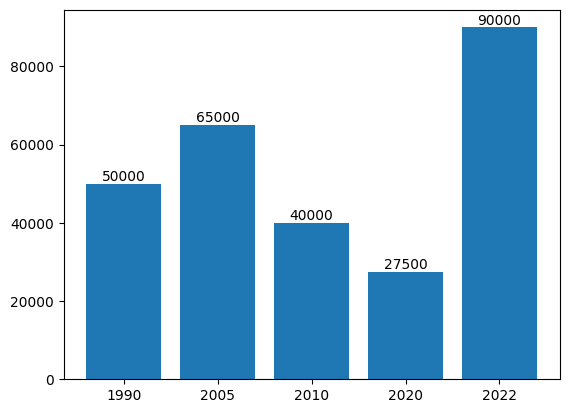

In [36]:
# VERTICAL BAR CHART
ad = plt.bar(data = gf, height ='sales', x = 'year')
plt.bar_label(ad, labels =gf['sales'], label_type = 'edge')
# HORIZONTAL BAR CHART
#fg = plt.barh(gf['year'],gf['sales'])
#plt.bar_label(fg, labels =gf['sales'], label_type = 'center')
plt.show()